In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [85]:
raw_data = pd.read_excel('/Users/mylesjauncey/Documents/GitHub/The-Holy-Churnity-Father-Son-and-Departed-User-/1 - Project Data.xlsx')

In [7]:
raw_data.head()

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,...,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,...,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,Competitor had better devices


In [9]:
raw_data.shape

(7043, 31)

In [12]:
raw_data.dtypes

CustomerID            object
Count                  int64
Country               object
State                 object
City                  object
Zip Code               int64
Lat Long              object
Latitude             float64
Longitude            float64
Gender                object
Senior Citizen        object
Partner               object
Dependents            object
Tenure Months          int64
Phone Service         object
Multiple Lines        object
Internet Service      object
Online Security       object
Online Backup         object
Device Protection     object
Tech Support          object
Streaming TV          object
Streaming Movies      object
Contract              object
Paperless Billing     object
Payment Method        object
Monthly Charges      float64
Total Charges         object
Churn Label           object
Churn Value            int64
Churn Reason          object
dtype: object

In [24]:
for col in raw_data.columns:
    print(f'Columnm: {col}\n')
    print(f'{raw_data[col].unique()}\n\n')

Columnm: CustomerID

['3668-QPYBK' '9237-HQITU' '9305-CDSKC' ... '2234-XADUH' '4801-JZAZL'
 '3186-AJIEK']


Columnm: Count

[1]


Columnm: Country

['United States']


Columnm: State

['California']


Columnm: City

['Los Angeles' 'Beverly Hills' 'Huntington Park' ... 'Standish' 'Tulelake'
 'Olympic Valley']


Columnm: Zip Code

[90003 90005 90006 ... 96128 96134 96146]


Columnm: Lat Long

['33.964131, -118.272783' '34.059281, -118.30742' '34.048013, -118.293953'
 ... '40.346634, -120.386422' '41.813521, -121.492666'
 '39.191797, -120.212401']


Columnm: Latitude

[33.964131 34.059281 34.048013 ... 40.346634 41.813521 39.191797]


Columnm: Longitude

[-118.272783 -118.30742  -118.293953 ... -120.386422 -121.492666
 -120.212401]


Columnm: Gender

['Male' 'Female']


Columnm: Senior Citizen

['No' 'Yes']


Columnm: Partner

['No' 'Yes']


Columnm: Dependents

['No' 'Yes']


Columnm: Tenure Months

[ 2  8 28 49 10  1 47 17  5 34 11 15 18  9  7 12 25 68 55 37  3 27 20  4
 58 53 13  6 19 

Customer_ID - String

Country - String/Category

State - String/Category

City - String/Category

Lat/Long - might not be needed (Check if data matches lat and long columns)

Gender - String/Category

Senior Citizen - Bool

Partner - Bool

Dependants - Bool

Phone Service - Bool

Multiple Lines - Category

Internet Service - Category

Online Security - Category

Online Backup - Category

Device Protection - Category

Tech Support - Category

Streaming TV - Category

Contract - Category

Paper Less Billing - Category

Payment Method - Category

Total Charges - Float

Churn Label - Bool (similar to churn val)

Churn Value - Bool (^^)

Churn Reason - Category

In [51]:
(raw_data == ' ').sum()

CustomerID            0
Count                 0
Country               0
State                 0
City                  0
Zip Code              0
Lat Long              0
Latitude              0
Longitude             0
Gender                0
Senior Citizen        0
Partner               0
Dependents            0
Tenure Months         0
Phone Service         0
Multiple Lines        0
Internet Service      0
Online Security       0
Online Backup         0
Device Protection     0
Tech Support          0
Streaming TV          0
Streaming Movies      0
Contract              0
Paperless Billing     0
Payment Method        0
Monthly Charges       0
Total Charges        11
Churn Label           0
Churn Value           0
Churn Reason          0
dtype: int64

No NaN's, No Empty Strings, 11 Space cells in total_charges

In [53]:
def TotalChargesEst(df):
    df['total_charges'] = pd.to_numeric(df['total_charges'].replace(' ', np.nan), errors='coerce')

    changed_indices = df[df['total_charges'].isna()].index

    calculated_total = df['monthly_charges']*df['tenure_months']
    df['total_charges'] = df['total_charges'].fillna(calculated_total)

    return df, changed_indices

In [109]:
def BoolMapping(df, cols):
    for col in cols:
        if col in ['senior_citizen', 'partner', 'dependents', 'phone_service', 'paper_billing']:
            df[col] = df[col].map({'Yes': 1, 'No': 0})
        if col == 'gender':
            df['is_male'] = df[col].map({'Male': 1, 'Female': 0})
            df.drop(columns = 'gender', inplace=True)
            cols = ['is_male' if c == 'gender' else c for c in cols]
    return df, cols

In [110]:
def Cleaning(rawdf, catcol, boolcol, stringcol, floatcol,
             dropcol):
    df = rawdf.copy()

    #Change Column Names
    df.columns = df.columns.str.strip().str.replace(' ',  '_').str.lower()

    #FillMissingData Section
    df, est_indicies = TotalChargesEst(df)
    df['churn_reason'].fillna('No Reason', inplace=True)

    #ChangeType Section

    df[catcol] = df[catcol].astype('category')
    #Bools
    df, boolcol_altered = BoolMapping(df, cols = boolcol)
    df[boolcol_altered] = df[boolcol_altered].astype('bool')
    df[stringcol] = df[stringcol].astype('string')
    df[floatcol] = df[floatcol].astype('float')

    #DropColumns
    df.drop(columns=dropcol, inplace=True)

    return df

In [55]:
def is_float(x):
    try:
        float(x)
        return True
    except:
        return False

In [31]:
invalid_rows = raw_data[~raw_data['Total Charges'].apply(is_float)]
invalid_rows

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Reason
2234,4472-LVYGI,1,United States,California,San Bernardino,92408,"34.084909, -117.258107",34.084909,-117.258107,Female,...,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No,0,NaN
2438,3115-CZMZD,1,United States,California,Independence,93526,"36.869584, -118.189241",36.869584,-118.189241,Male,...,No internet service,No internet service,Two year,No,Mailed check,20.25,,No,0,NaN
2568,5709-LVOEQ,1,United States,California,San Mateo,94401,"37.590421, -122.306467",37.590421,-122.306467,Female,...,Yes,Yes,Two year,No,Mailed check,80.85,,No,0,NaN
2667,4367-NUYAO,1,United States,California,Cupertino,95014,"37.306612, -122.080621",37.306612,-122.080621,Male,...,No internet service,No internet service,Two year,No,Mailed check,25.75,,No,0,NaN
2856,1371-DWPAZ,1,United States,California,Redcrest,95569,"40.363446, -123.835041",40.363446,-123.835041,Female,...,Yes,No,Two year,No,Credit card (automatic),56.05,,No,0,NaN
4331,7644-OMVMY,1,United States,California,Los Angeles,90029,"34.089953, -118.294824",34.089953,-118.294824,Male,...,No internet service,No internet service,Two year,No,Mailed check,19.85,,No,0,NaN
4687,3213-VVOLG,1,United States,California,Sun City,92585,"33.739412, -117.173334",33.739412,-117.173334,Male,...,No internet service,No internet service,Two year,No,Mailed check,25.35,,No,0,NaN
5104,2520-SGTTA,1,United States,California,Ben Lomond,95005,"37.078873, -122.090386",37.078873,-122.090386,Female,...,No internet service,No internet service,Two year,No,Mailed check,20.00,,No,0,NaN
5719,2923-ARZLG,1,United States,California,La Verne,91750,"34.144703, -117.770299",34.144703,-117.770299,Male,...,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No,0,NaN
6772,4075-WKNIU,1,United States,California,Bell,90201,"33.970343, -118.171368",33.970343,-118.171368,Female,...,Yes,No,Two year,No,Mailed check,73.35,,No,0,NaN


In [35]:
testdf = raw_data.copy()
testdf.dropna(inplace=True)
testdf['calctot'] = testdf['Monthly Charges'] * testdf['Tenure Months']
testdf['range'] = testdf['calctot'] - testdf['Total Charges']

testdf[['calctot', 'Total Charges', 'range']]

,calctot,Total Charges,range
0,107.70,108.15,-0.45
1,141.40,151.65,-10.25
2,797.20,820.5,-23.3
3,2934.40,3046.05,-111.65
4,5081.30,5036.3,45.0
...,...,...,...
1864,717.60,727.8,-10.2
1865,397.80,403.35,-5.55
1866,75.75,75.75,0.0
1867,6897.65,6886.25,11.4


In [36]:
min(testdf['range'])

-274.34999999999945

In [37]:
max(testdf['range'])

355.35000000000036

<Axes: xlabel='range', ylabel='Count'>

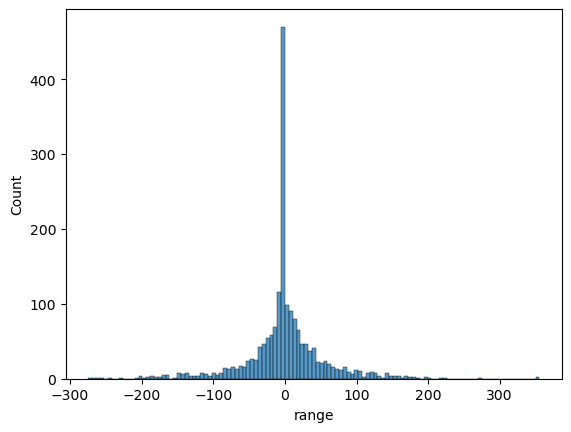

In [38]:
sns.histplot(testdf['range'])

In [111]:
CatCol = ['city', 'multiple_lines', 'internet_service', 'online_security', 'online_backup', 'device_protection', 'tech_support', 'streaming_tv', 'contract', 'paperless_billing', 'payment_method', 'churn_reason']
BoolCol = ['gender', 'senior_citizen', 'partner', 'dependents', 'phone_service', 'churn_value']
StringCol = ['customerid']
FloatCol = ['total_charges']
DropCol = ['country', 'count', 'churn_label', 'lat_long', 'state']

#phone service and multiple lines same information

cleandf = Cleaning(raw_data, catcol=CatCol, boolcol=BoolCol, stringcol=StringCol, floatcol=FloatCol, dropcol=DropCol)

Index(['customerid', 'count', 'country', 'state', 'city', 'zip_code',
       'lat_long', 'latitude', 'longitude', 'senior_citizen', 'partner',
       'dependents', 'tenure_months', 'phone_service', 'multiple_lines',
       'internet_service', 'online_security', 'online_backup',
       'device_protection', 'tech_support', 'streaming_tv', 'streaming_movies',
       'contract', 'paperless_billing', 'payment_method', 'monthly_charges',
       'total_charges', 'churn_label', 'churn_value', 'churn_reason',
       'is_male'],
      dtype='object')
['is_male', 'senior_citizen', 'partner', 'dependents', 'phone_service', 'churn_value']


/var/folders/ck/j26tby551231jzzyzr1y09mr0000gn/T/ipykernel_79238/171295984.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['total_charges'] = pd.to_numeric(df['total_charges'].replace(' ', np.nan), errors='coerce')
/var/folders/ck/j26tby551231jzzyzr1y09mr0000gn/T/ipykernel_79238/3484146975.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform

In [112]:
cleandf.value_counts()

customerid  city            zip_code  latitude   longitude    senior_citizen  partner  dependents  tenure_months  phone_service  multiple_lines    internet_service  online_security      online_backup        device_protection    tech_support         streaming_tv         streaming_movies     contract        paperless_billing  payment_method             monthly_charges  total_charges  churn_value  churn_reason           is_male
0002-ORFBO  Frazier Park    93225     34.827662  -118.999073  False           True     False       9              True           No                DSL               No                   Yes                  No                   Yes                  Yes                  No                   One year        Yes                Mailed check               65.60            593.30         False        No Reason              False      1
6616-AALSR  Citrus Heights  95610     38.695080  -121.271616  False           True     True        65             True           Yes     

In [113]:
raw_data.value_counts()

CustomerID  Count  Country        State       City           Zip Code  Lat Long                Latitude   Longitude    Gender  Senior Citizen  Partner  Dependents  Tenure Months  Phone Service  Multiple Lines  Internet Service  Online Security  Online Backup  Device Protection  Tech Support  Streaming TV  Streaming Movies  Contract        Paperless Billing  Payment Method             Monthly Charges  Total Charges  Churn Label  Churn Value  Churn Reason                             
0004-TLHLJ  1      United States  California  Costa Mesa     92627     33.645672, -117.922613  33.645672  -117.922613  Male    No              No       No          4              Yes            No              Fiber optic       No               No             Yes                No            No            No                Month-to-month  Yes                Electronic check           73.90            280.85         Yes          1            Price too high                               1
6410-LEFEN  1      Un

In [83]:
cleandf.shap

(7043, 26)

In [84]:
raw_data.shape

(7043, 31)